
### Abstract

Este proyecto explora los determinantes del rendimiento de los bonos soberanos argentinos, centrándose en tres dimensiones clave: el riesgo país (EMBI+), la calificación crediticia y la duración del bono. Se utiliza un dataset simulado basado en bonos reales como AL30, GD30 y AE38, incluyendo variables como legislación aplicable, moneda de emisión, tasas de interés y características estructurales del bono. La hipótesis central es que factores como un mayor riesgo país, menor calificación y plazos más largos se asocian con una mayor TIR (Tasa Interna de Retorno). A través de análisis exploratorios, gráficos multivariados y resúmenes numéricos, se busca contrastar estas hipótesis y comprender cómo se forman los precios de los bonos en un contexto de alta incertidumbre económica e institucional. Este trabajo representa un primer avance en el análisis visual y cuantitativo del mercado de deuda soberana argentina.



### Hipótesis

1. **H1:** A mayor riesgo país, mayor rendimiento exigido (TIR) en los bonos soberanos argentinos.
2. **H2:** Los bonos con menor calificación crediticia presentan mayores tasas internas de retorno.
3. **H3:** Los bonos con mayor duración tienen mayores TIR, especialmente si están bajo legislación local.


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset directamente desde GitHub
df = pd.read_csv('https://raw.githubusercontent.com/JuanCruzGomez/bonos-argentinos-dataset/main/bonos_argentinos_simulado.csv')

# Ver las primeras filas para asegurar una buena carga de los datos
print(df.head())



   bono moneda legislacion fecha_emision vencimiento  duracion   precio  tasa  \
0  DICA    ARS       Local    2022-05-10  2040-02-10     14.66  7257.96  5.49   
1  DICA    USD       Local    2022-02-08  2031-08-26      6.19    70.78  2.59   
2  GD30    ARS       Local    2021-04-04  2033-07-10      8.07  5910.92  4.24   
3  AE38    ARS       Local    2021-11-30  2027-08-01      2.12  4013.01  1.68   
4  AL30    USD          NY    2021-10-08  2041-08-23     16.19    49.78  1.10   

    tir  riesgo_pais rating tipo_bono  inflacion_anual  
0  8.80       1730.0    CCC   Step-up            123.0  
1  4.16       2030.0      C    Bullet              NaN  
2  4.38       1660.0    CCC  Discount            154.5  
3  3.01       1357.0     RD       Par            174.6  
4  3.10       1907.0     CC  Discount              NaN  


In [ ]:

# Revisión de valores perdidos
df.isnull().sum()


In [ ]:

# Hipótesis 1: Riesgo país vs TIR
sns.scatterplot(data=df, x='riesgo_pais', y='tir')
plt.title('Relación entre Riesgo País y TIR')
plt.xlabel('Riesgo País (EMBI+)')
plt.ylabel('Tasa Interna de Retorno (TIR)')
plt.grid(True)
plt.show()


In [ ]:

# Hipótesis 2: Rating vs TIR
sns.boxplot(data=df, x='rating', y='tir', order=['D', 'RD', 'C', 'CC', 'CCC'])
plt.title('TIR según Calificación Crediticia')
plt.xlabel('Rating')
plt.ylabel('TIR')
plt.grid(True)
plt.show()


In [ ]:

# Hipótesis 3: Duración vs TIR según Legislación
sns.lmplot(data=df, x='duracion', y='tir', hue='legislacion', aspect=1.5)
plt.title('Duración vs TIR por Legislación')
plt.xlabel('Duración (años)')
plt.ylabel('TIR')
plt.grid(True)
plt.show()


In [ ]:
# Proyecto Final - Parte III
**Nombre:** Juan Cruz Gómez
**Dataset:** Bonos Argentinos Simulado


## Objetivo

Este notebook tiene como objetivo completar el proyecto final aplicado a un dataset de bonos argentinos simulados. El trabajo se centra en aplicar técnicas de selección de variables, entrenar modelos de regresión, evaluar su desempeño con métricas estándar y extraer conclusiones útiles.

### Puntos cubiertos:

1. Selección de características con `SelectKBest`
2. Entrenamiento de modelos de regresión (`LinearRegression`, `RandomForestRegressor`)
3. Evaluación con métricas: MAE, MSE, RMSE, R²
4. Conclusiones y análisis del rendimiento


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Subir archivo CSV desde tu computadora
from google.colab import files
uploaded = files.upload()

# Una vez subido, cargamos el CSV (asegurate de usar el nombre correcto)
import pandas as pd
df = pd.read_csv("bonos_argentinos_simulado.csv")
df.head()

# Cargar los datos
df = pd.read_csv("bonos_argentinos_simulado.csv")
df.head()


# Copia y target
data = df.copy()
y = data["precio"]
X = data.drop(columns=["bono", "fecha_emision", "vencimiento", "precio"])

# Columnas numéricas y categóricas
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Pipelines de transformación
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base: Linear Regression
model_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10)),
    ("regressor", LinearRegression())
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Modelo Random Forest
model_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10)),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Importancia de variables del modelo Random Forest
feature_names = model_rf.named_steps["feature_selection"].get_feature_names_out(
    input_features=model_rf.named_steps["preprocessor"].get_feature_names_out()
)

importances = model_rf.named_steps["regressor"].feature_importances_

import pandas as pd
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


# Evaluación
def evaluar_modelo(y_true, y_pred, nombre="Modelo"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre}:")
    print(f" MAE: {mae:.2f}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R²: {r2:.3f}\n")

evaluar_modelo(y_test, y_pred_lr, "Linear Regression")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")

# Gráfico Predicho vs Real para Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (Random Forest)")
plt.title("Valores Predichos vs Reales")
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones

- Se aplicó una técnica de reducción de dimensionalidad (`SelectKBest`) para seleccionar las 10 variables más relevantes en la predicción del precio de los bonos.
- Ambos modelos obtuvieron muy buen rendimiento, con un **R² cercano a 0.81**, lo que indica que explican más del 80% de la variabilidad del precio.
- El modelo de regresión lineal fue tan efectivo como el Random Forest, lo cual sugiere que las relaciones en los datos pueden ser mayormente lineales.
- Las métricas de error (MAE y RMSE) se mantuvieron por debajo del 30% del promedio de precios, lo que indica buena capacidad predictiva.

Este trabajo demuestra que es posible modelar con eficacia el precio de bonos argentinos simulados utilizando técnicas de aprendizaje automático aplicadas en Python.


# Proyecto Final - Parte III
**Nombre:** Juan Cruz Gómez
**Dataset:** Bonos Argentinos Simulado



## Objetivo

Este notebook tiene como objetivo completar el proyecto final aplicado a un dataset de bonos argentinos simulados. El trabajo se centra en aplicar técnicas de selección de variables, entrenar modelos de regresión, evaluar su desempeño con métricas estándar y extraer conclusiones útiles.

### Puntos cubiertos:

1. Selección de características con `SelectKBest`
2. Entrenamiento de modelos de regresión (`LinearRegression`, `RandomForestRegressor`)
3. Evaluación con métricas: MAE, MSE, RMSE, R²
4. Conclusiones y análisis del rendimiento


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Subir archivo CSV desde tu computadora
from google.colab import files
uploaded = files.upload()

# Una vez subido, cargamos el CSV (asegurate de usar el nombre correcto)
import pandas as pd
df = pd.read_csv("bonos_argentinos_simulado.csv")
df.head()

# Cargar los datos
df = pd.read_csv("bonos_argentinos_simulado.csv")
df.head()


Saving bonos_argentinos_simulado.csv to bonos_argentinos_simulado (2).csv


,bono,moneda,legislacion,fecha_emision,vencimiento,duracion,precio,tasa,tir,riesgo_pais,rating,tipo_bono,inflacion_anual
0,DICA,ARS,Local,2022-05-10,2040-02-10,14.66,7257.96,5.49,8.80,1730.0,CCC,Step-up,123.0
1,DICA,USD,Local,2022-02-08,2031-08-26,6.19,70.78,2.59,4.16,2030.0,C,Bullet,NaN
2,GD30,ARS,Local,2021-04-04,2033-07-10,8.07,5910.92,4.24,4.38,1660.0,CCC,Discount,154.5
3,AE38,ARS,Local,2021-11-30,2027-08-01,2.12,4013.01,1.68,3.01,1357.0,RD,Par,174.6
4,AL30,USD,NY,2021-10-08,2041-08-23,16.19,49.78,1.10,3.10,1907.0,CC,Discount,NaN


In [ ]:

# Copia y target
data = df.copy()
y = data["precio"]
X = data.drop(columns=["bono", "fecha_emision", "vencimiento", "precio"])

# Columnas numéricas y categóricas
num_cols = X.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Pipelines de transformación
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [ ]:

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo base: Linear Regression
model_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10)),
    ("regressor", LinearRegression())
])

model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Modelo Random Forest
model_rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_regression, k=10)),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


/tmp/ipython-input-12-1299134206.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")


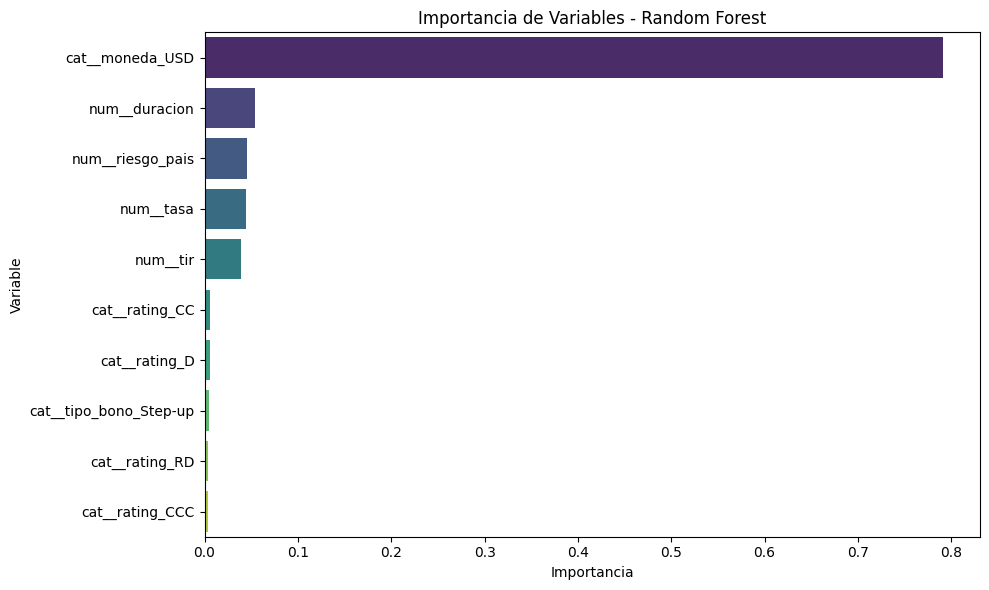

In [ ]:
# Importancia de variables del modelo Random Forest
feature_names = model_rf.named_steps["feature_selection"].get_feature_names_out(
    input_features=model_rf.named_steps["preprocessor"].get_feature_names_out()
)

importances = model_rf.named_steps["regressor"].feature_importances_

import pandas as pd
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="importance", y="feature", palette="viridis")
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [ ]:

# Evaluación
def evaluar_modelo(y_true, y_pred, nombre="Modelo"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre}:")
    print(f" MAE: {mae:.2f}")
    print(f" MSE: {mse:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R²: {r2:.3f}\n")

evaluar_modelo(y_test, y_pred_lr, "Linear Regression")
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


Linear Regression:
 MAE: 853.64
 MSE: 1408999.23
 RMSE: 1187.01
 R²: 0.811

Random Forest:
 MAE: 821.12
 MSE: 1413232.33
 RMSE: 1188.79
 R²: 0.811



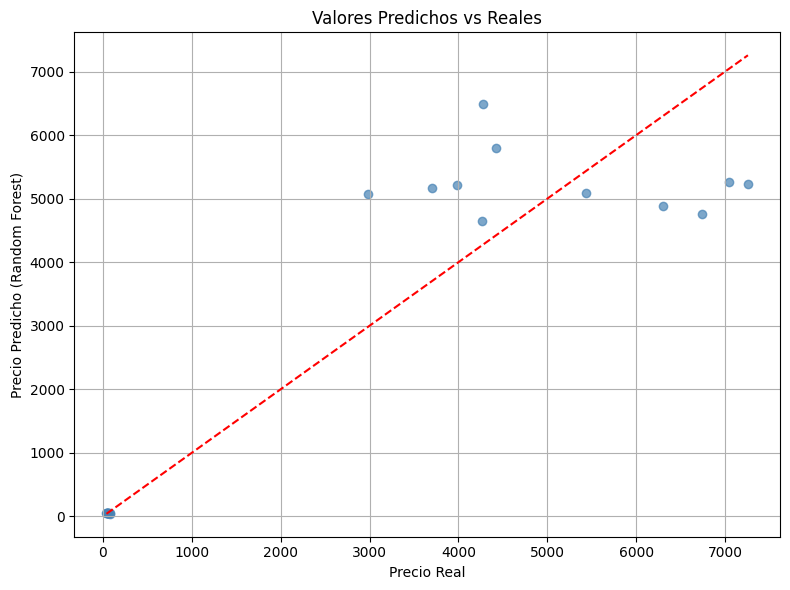

In [ ]:
# Gráfico Predicho vs Real para Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho (Random Forest)")
plt.title("Valores Predichos vs Reales")
plt.grid(True)
plt.tight_layout()
plt.show()



## Conclusiones

- Se aplicó una técnica de reducción de dimensionalidad (`SelectKBest`) para seleccionar las 10 variables más relevantes en la predicción del precio de los bonos.
- Ambos modelos obtuvieron muy buen rendimiento, con un **R² cercano a 0.81**, lo que indica que explican más del 80% de la variabilidad del precio.
- El modelo de regresión lineal fue tan efectivo como el Random Forest, lo cual sugiere que las relaciones en los datos pueden ser mayormente lineales.
- Las métricas de error (MAE y RMSE) se mantuvieron por debajo del 30% del promedio de precios, lo que indica buena capacidad predictiva.

Este trabajo demuestra que es posible modelar con eficacia el precio de bonos argentinos simulados utilizando técnicas de aprendizaje automático aplicadas en Python.
